In [1]:
import pandas as pd 
import numpy as np 
import operator
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs, load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz



# AGENDA: 
    #Unpack data 
    #Group categories 
    #HeatMap .corr() by categories
    #Graph top 10 .count() shares
    #Perform DTC as seen in lec 11_3 
    #Perform KNN Analysis as seen in lec 13 
    #Structure stategy consistent with vizualizations. 


# Unpack the data 

In [2]:
data = pd.read_csv("/Users/me./Desktop/Spring '22 /APP Analytics & P Modeling/Case Assignments/CaseStudy3/OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#remove space from column name. 
data.columns = data.columns.str.replace(' ','')
data.columns = data.columns.str.replace('self_reference_avg_sharess', 'self_reference_avg_shares')

#remove NaN (shouldnt be any anyways just good practice)
data.dropna()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,1.0,0.644128,24,1,12,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.539493,1.0,0.692661,10,1,1,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [4]:
data['shares'].loc[data['shares']< 1400] = 0
data['shares'].loc[data['shares'] >= 1400] = 1


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
x = data.drop(columns = ['url','shares', 'timedelta']) #feature Columns 
y = data['shares'] #class label column

# Group categories 


In [7]:
#Group Tokens 
tokens = ['shares', 'n_tokens_title', 'n_tokens_content', 'average_token_length']
xtokens = pd.DataFrame(data, columns = tokens)

#Group channel 
channel = ['shares', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']
xchannel = pd.DataFrame(data, columns= channel)

# Group Key Words
kw = ['shares', 'kw_avg_min','kw_avg_max','kw_avg_avg', 'num_keywords']
xkw = pd.DataFrame(data, columns= kw)

# Group self reference
selfref = ['shares', 'self_reference_avg_shares', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos']
xselfref = pd.DataFrame(data, columns= selfref)

# Group Day of the Week 
dow = ['shares', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']
xdow = pd.DataFrame(data, columns= dow)

#Group LDA
lda = ['shares', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
xlda = pd.DataFrame(data, columns= lda)

#Group Global 
glbl = ['shares', 'global_subjectivity']
xglob = pd.DataFrame(data, columns=glbl)

#Group Emotional
emo = ['shares', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity']
xemo = pd.DataFrame(data, columns = emo)

groups = [tokens, channel, kw, selfref, dow, lda, glbl, emo]


# HeatMap by Category

Tokens vs Shares 

Text(0.5, 1.0, 'Tokens vs. Shares Correlation Map')

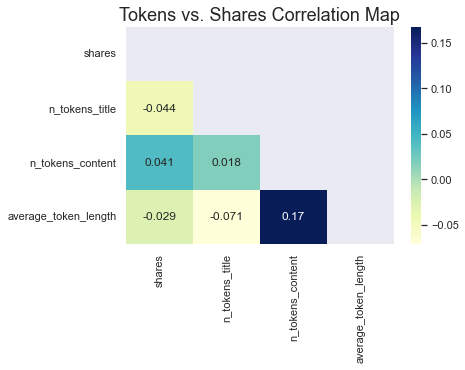

In [8]:
tvs = sns.heatmap(xtokens.corr(), cmap = 'YlGnBu', annot= True,  mask= np.triu(xtokens.corr()))
plt.title('Tokens vs. Shares Correlation Map', fontsize = 18)


Channel vs Shares 

Text(0.5, 1.0, 'Channels types vs Shares Correlation Map')

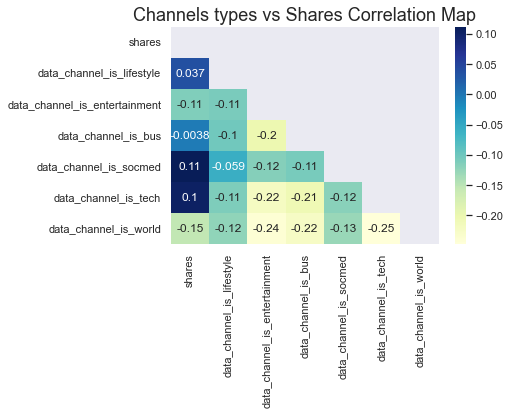

In [9]:
chanvs = sns.heatmap(xchannel.corr(), cmap = 'YlGnBu', annot = True, mask=np.triu(xchannel.corr()))
plt.title('Channels types vs Shares Correlation Map', fontsize = 18)

Kew words vs Shares 

Text(0.5, 1.0, 'Kew Words vs Shares Correlation Map')

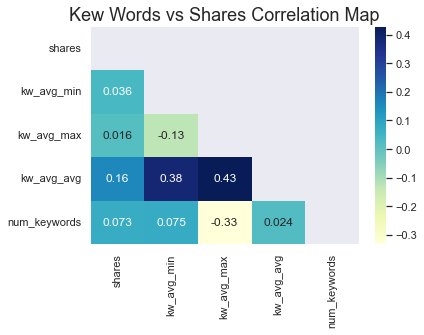

In [10]:
kwvs = sns.heatmap(xkw.corr(), cmap = 'YlGnBu', annot= True, mask = np.triu(xkw.corr()))
plt.title('Kew Words vs Shares Correlation Map', fontsize = 18)

Self references vs Shares

Text(0.5, 1.0, 'Self References vs Shares Correlation Map')

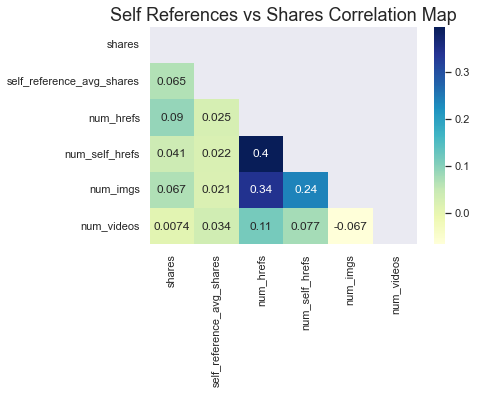

In [11]:
selfrefvs = sns.heatmap(xselfref.corr(), cmap = 'YlGnBu', annot= True, mask = np.triu(xselfref.corr()))
plt.title('Self References vs Shares Correlation Map', fontsize = 18) 

Day of the week vs Shares

Text(0.5, 1.0, 'Day Of the Week vs Shares Correlation Map')

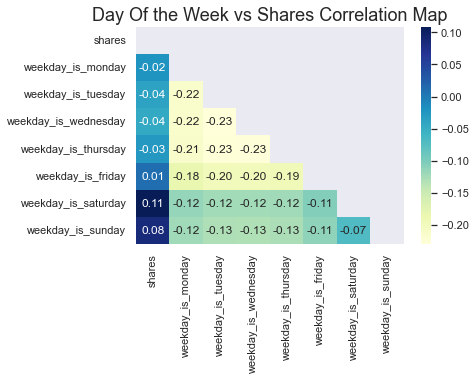

In [12]:
dowvs = sns.heatmap(xdow.corr(), cmap ='YlGnBu', annot= True, fmt = '.2f', mask = np.triu(xdow.corr()))
plt.title('Day Of the Week vs Shares Correlation Map', fontsize = 18)

LDA vs Shares

Text(0.5, 1.0, 'LDA vs Shares Correlation Map')

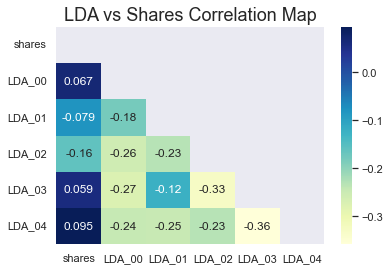

In [13]:
ldavs = sns.heatmap(xlda.corr(), cmap = 'YlGnBu', annot= True, mask = np.triu(xlda.corr()))
plt.title("LDA vs Shares Correlation Map", fontsize = 18)

Global vs Shares

Text(0.5, 1.0, 'Global Data vs Shares Correlation Map')

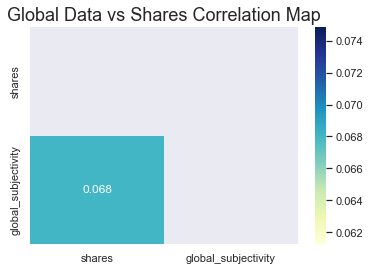

In [14]:
glblvs = sns.heatmap(xglob.corr(), cmap = 'YlGnBu', annot = True, mask = np.triu(xglob.corr()))
plt.title('Global Data vs Shares Correlation Map', fontsize = 18)

Emotional vs Shares

Text(0.5, 1.0, 'Emotions vs Shares Correlation Map')

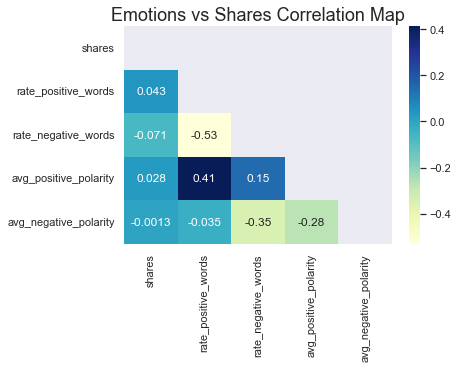

In [15]:
emovs = sns.heatmap(xemo.corr(), cmap = 'YlGnBu', annot=True, mask = np.triu(xemo.corr()))
plt.title('Emotions vs Shares Correlation Map', fontsize = 18)

# Perform PCA Analysis
        #explained variance ration sum

In [16]:
xminmax = MinMaxScaler().fit_transform(x)
xnew = pd.DataFrame(xminmax, columns = list(x.columns))
xnew.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500
1,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,...,0.286915,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000
2,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,0.546334,...,0.495833,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000
3,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,0.547768,...,0.385965,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000
4,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,0.582331,...,0.411127,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364


In [17]:
pca = PCA()
pca.fit(xnew)
pca.explained_variance_ratio_.cumsum()

array([0.10213886, 0.19648327, 0.27796239, 0.34581965, 0.40971539,
       0.47209986, 0.53357307, 0.59107745, 0.64103798, 0.68822687,
       0.72917529, 0.76653245, 0.79410714, 0.8192304 , 0.84217627,
       0.86420477, 0.88605275, 0.90677527, 0.91879667, 0.93019038,
       0.9393833 , 0.94778902, 0.95546333, 0.9625997 , 0.96922753,
       0.97307031, 0.97666799, 0.97987178, 0.98274918, 0.98507484,
       0.98724007, 0.98928314, 0.99126104, 0.9926725 , 0.99387856,
       0.99496395, 0.99595685, 0.99665671, 0.99730381, 0.99783291,
       0.99824996, 0.99860926, 0.99893491, 0.99920726, 0.99943627,
       0.99959835, 0.99974972, 0.99988127, 0.99994713, 0.99997401,
       0.99998802, 0.99999717, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

# Perform KNN Analysis as seen in lec 13 
    #min max scaler
    #determine number of neighbors for best accuracy 
    #KNN

In [26]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(xnew, y)

print(cross_val_score(knn,xnew,y, cv=5))
print(round(np.mean(cross_val_score(knn,xnew,y,cv =5)), 2))

[0.56993316 0.58254509 0.5956615  0.59641821 0.58652876]
0.59


# Perform KNN Analysis as seen in lec 13 
    #Standard Scaler
    #determine number of neighbors for best accuracy 
    #KNN

In [27]:
xstd = StandardScaler().fit_transform(x) 
xnstd = pd.DataFrame(xstd, columns = x.columns)
# xnstd.head()

In [30]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(xnstd, y)

# print(cross_val_score(knn,xnstd,y, cv=5))
print(round(np.mean(cross_val_score(knn,xnstd,y,cv =5)), 2))

0.59


# Logistic Regression 
        #Standard Scaler sorted

In [41]:
model = LogisticRegression()
model.fit(xnstd,y)
importance = model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %0.5f'%(i,v))


Feature: 0, Score: 0.00528
Feature: 1, Score: 0.07240
Feature: 2, Score: -0.38022
Feature: 3, Score: 1.54298
Feature: 4, Score: -1.13526
Feature: 5, Score: 0.09960
Feature: 6, Score: -0.07031
Feature: 7, Score: 0.02130
Feature: 8, Score: 0.00190
Feature: 9, Score: -0.09840
Feature: 10, Score: 0.08212
Feature: 11, Score: -0.02471
Feature: 12, Score: -0.11176
Feature: 13, Score: -0.06283
Feature: 14, Score: 0.20490
Feature: 15, Score: 0.21024
Feature: 16, Score: 0.02158
Feature: 17, Score: 0.13414
Feature: 18, Score: 0.09451
Feature: 19, Score: -0.11436
Feature: 20, Score: -0.03432
Feature: 21, Score: -0.06702
Feature: 22, Score: -0.07984
Feature: 23, Score: -0.10108
Feature: 24, Score: -0.54869
Feature: 25, Score: 0.94652
Feature: 26, Score: 0.08932
Feature: 27, Score: 0.02058
Feature: 28, Score: 0.06636
Feature: 29, Score: -0.00805
Feature: 30, Score: -0.05771
Feature: 31, Score: -0.05787
Feature: 32, Score: -0.03548
Feature: 33, Score: 0.03751
Feature: 34, Score: 0.12677
Feature: 35, 

In [42]:
newdi = dict(zip(xnew, importance))
import operator 
sorted_dic = sorted(newdi.items(), key = operator.itemgetter(1), reverse= True)[:20]
for i in sorted_dic:
    print(i)

('n_non_stop_words', 1.542979912123003)
('kw_avg_avg', 0.9465182432842003)
('data_channel_is_tech', 0.21023976431072605)
('data_channel_is_socmed', 0.20489547827709312)
('LDA_00', 0.19935876371135702)
('is_weekend', 0.14420177720933228)
('kw_min_min', 0.13414278473605734)
('weekday_is_saturday', 0.1267741509981198)
('global_subjectivity', 0.11528609740583819)
('num_hrefs', 0.09960243296349823)
('kw_max_min', 0.09451233403649535)
('self_reference_min_shares', 0.08932035041479144)
('num_keywords', 0.0821249652505088)
('n_tokens_content', 0.07240063366931115)
('weekday_is_sunday', 0.07138138186408922)
('rate_positive_words', 0.06797008590315846)
('self_reference_avg_shares', 0.06635938169788647)
('global_rate_negative_words', 0.0617001727190333)
('title_sentiment_polarity', 0.053844095008199755)
('LDA_04', 0.053302840327486466)


# Linear Regression
        #MinMaxScaler Sorted

In [53]:
model = LogisticRegression()
model.fit(xnew,y)
importance = model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %0.5f'%(i,v))

Feature: 0, Score: -0.02490
Feature: 1, Score: 1.31774
Feature: 2, Score: 0.29401
Feature: 3, Score: 0.31979
Feature: 4, Score: 0.28528
Feature: 5, Score: 2.67384
Feature: 6, Score: -1.81726
Feature: 7, Score: 0.68271
Feature: 8, Score: 0.05099
Feature: 9, Score: -0.83224
Feature: 10, Score: 0.54519
Feature: 11, Score: -0.15199
Feature: 12, Score: -0.48240
Feature: 13, Score: -0.41314
Feature: 14, Score: 0.76774
Feature: 15, Score: 0.35428
Feature: 16, Score: -0.15983
Feature: 17, Score: 0.76660
Feature: 18, Score: -1.67703
Feature: 19, Score: -1.29006
Feature: 20, Score: -0.68585
Feature: 21, Score: -0.10527
Feature: 22, Score: 0.15486
Feature: 23, Score: 0.25697
Feature: 24, Score: -2.57176
Feature: 25, Score: 9.67612
Feature: 26, Score: 2.73509
Feature: 27, Score: 0.58570
Feature: 28, Score: 2.11508
Feature: 29, Score: -0.13771
Feature: 30, Score: -0.25330
Feature: 31, Score: -0.26028
Feature: 32, Score: -0.20063
Feature: 33, Score: -0.00455
Feature: 34, Score: 0.36200
Feature: 35, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
newdi = dict(zip(xnew, importance))
import operator 
sorted_dic = sorted(newdi.items(), key = operator.itemgetter(1), reverse= True)[:20]
for i in sorted_dic:
    print(i)

('kw_avg_avg', 9.676116468979759)
('self_reference_min_shares', 2.735092546928332)
('num_hrefs', 2.673838254361338)
('self_reference_avg_shares', 2.115075633288405)
('n_tokens_content', 1.3177432384852792)
('global_subjectivity', 1.0690330968655342)
('global_rate_negative_words', 0.849060856743183)
('data_channel_is_socmed', 0.7677396626150566)
('kw_min_min', 0.7665966037381748)
('num_imgs', 0.6827097647184672)
('self_reference_max_shares', 0.5856995578092936)
('LDA_00', 0.5679166855166758)
('num_keywords', 0.5451900164717133)
('is_weekend', 0.47690457968785843)
('title_sentiment_polarity', 0.38287024615268095)
('weekday_is_saturday', 0.36200029353147384)
('data_channel_is_tech', 0.35427579338525284)
('n_non_stop_words', 0.3197886940745014)
('n_unique_tokens', 0.29400728933614645)
('n_non_stop_unique_tokens', 0.285276917268546)


# Perform DTC as seen in lec 11_3 
        #standardize 
        #Decision Tree Classifier

In [22]:
xtrain, xtest, ytrain,ytest = train_test_split(xnew, y, test_size= 0.6, random_state= 10)


In [23]:
dt = DecisionTreeClassifier().fit(xtrain, ytrain)
ypred = dt.predict(xtest)
accuracy_score(ytest, ypred)

0.5824610081136755

Cross val score


In [24]:
dtc =DecisionTreeClassifier()
# cross_val_score(dt, xnew, y, cv =5)
np.mean(cross_val_score(dt,xnew,y,cv =5))

0.5555197241817803

# Structure stategy consistent with vizualizations. 
